# Exact sampling of Brownian path and Geometric Brownian path


## Abstract
You will learn eact sampling of BM path and GBM path

Reference: 

[1] Section 3.1 of [Gla03]: Random walk construction


## Analysis


To have exact simulation of Brownian path by random walk, one can follow (3.2) of [1], i.e.
$$W(t_{i+1}) = W(t_i) + \sqrt{t_{i+1} - t_i} Z_{i+1}.$$

### A function to generate a BM path using uniform mesh

Given an interval $[0,T]$, we can generate exact simulation with $n$ uniform mesh by
$$\hat W(t_{i+1}) = \hat W(t_i) + \frac{1}{\sqrt n} Z_{i+1}, \hbox{ for } i = 0, 1, \ldots, n-1.$$

__Demo__ Generate multiple paths and plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define a function of BM path generator
def BM_gen(T1, T2, n):  #para: start time, end time, and the mesh number 
    t = np.linspace(T1, T2, num = n+1) #init mesh
    W = np.zeros(n+1) #init BM
    #Run (3.2)
    for i in range(n):
        W[i+1] = W[i] + 1./np.sqrt(n) * np.random.normal()
        
    return t, W
    

mean is -0.042678407285547386 Variance is 0.9860322846871661


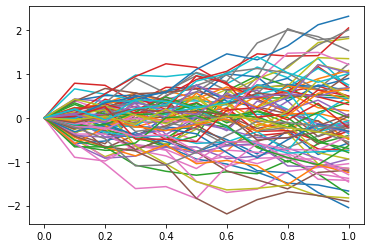

In [3]:
#test BM_gen and plot
#Also compute average and variance of $W(n)$

MeshN = 10; SimN = 80; #Mesh number and simulation number
SumW = 0; SqsumW = 0 #init sum of $W(n)$ and sum of $W^2(n)$
for i in range(SimN):
    [t,W] = BM_gen(0., 1., MeshN)
    SumW += W[MeshN]; SqsumW += np.square(W[MeshN])
    plt.plot(t, W);
    
MeanW = SumW/SimN; VarW = SqsumW/SimN - MeanW**2    
print("mean is", MeanW, "Variance is", VarW)

**Generating GBM path**

GBM is given by
$$X(t) = x_0 \exp\{(r - \frac 1 2 \sigma^2)t + \sigma W(t)\}.$$
We can replace $W(t)$ by its exact simulation $\hat W(t)$ to get exact simulation of $X(t)$, i.e.
$$\hat X(t) = x_0 \exp\{(r - \frac 1 2 \sigma^2)t + \sigma \hat W(t)\}.$$

**Application to Arithmetic asian option price**

Arithmetic asian call option with maturity $T$ and strick $K$ has its pay off as
$$C(T) = (A(T) - K)^+,$$
where $A(T)$ is arithmetic average of the stock price at times
$0 \le t_1 < t_2, \ldots, < t_n = T$, i.e.
$$A(T) = \frac{1}{n} \sum_{i=1}^n S(t_i).$$

The call price can be thus written by
$$C_0 = \mathbb E [e^{-rT} (A(T) - K)^+].$$


Unlike the geometric asian option, arithmetic counterpart does not have explicit formula for its price.
In this below, we shall use MC. 
In practice, an arithmetic asian option with a given number $n$ 
of time steps takes the price average at $n+1$ points
$$t_i = (i-1) \frac{T}{n}, \quad i = 1, 2, \ldots, (n+1).$$

__Pseudocode__ bsm_arithmetic_asian_price(otype, strike, maturity, num_step, num_path):

- generate (num_path) many paths by exact sampling;
- compute discounted payoff for each path;
- Take the average for the option price.